In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# vanilla = pd.read_csv('L2_distances/level5_L2_general_vanilla.tsv', sep = '\t')
# beta = pd.read_csv('L2_distances/level5_L2_general_beta.tsv', sep = '\t')
# mmd = pd.read_csv('L2_distances/level5_L2_general_mmd.tsv', sep = '\t')
# pca = pd.read_csv('L2_distances/level5_L2_general_pca.tsv', sep = '\t')
# complete = pd.read_csv('L2_distances/level5_L2_general_complete.tsv', sep = '\t')
vanilla = pd.read_csv('L2_distances/level5_PEARSON_general_vanilla.tsv', sep = '\t')
beta = pd.read_csv('L2_distances/level5_PEARSON_general_beta.tsv', sep = '\t')
mmd = pd.read_csv('L2_distances/level5_PEARSON_general_mmd.tsv', sep = '\t')
pca = pd.read_csv('L2_distances/level5_PEARSON_general_pca.tsv', sep = '\t')
complete = pd.read_csv('L2_distances/level5_PEARSON_general_complete.tsv', sep = '\t')

In [5]:
beta.head(50)

,Unnamed: 0,Unshuffled,Shuffled
0,0,0.712793,0.066271
1,1,0.992934,0.051729
2,2,0.993822,0.052256
3,3,0.945585,0.052379
4,4,0.987347,0.058577
5,5,0.976733,0.059752
6,6,0.977167,0.070851
7,7,0.988542,0.049181
8,8,0.563739,0.046990
9,9,0.987552,0.058172


In [4]:
moas.loc[19]['moa']

NameError: name 'moas' is not defined

In [6]:
moas = pd.read_csv('moas.csv')

In [7]:
color_moas = ['microtubule inhibitor|tubulin polymerization inhibitor', 'Aurora kinase inhibitor|JAK inhibitor', 'AKT inhibitor|mTOR inhibitor','cholesterol inhibitor|lipase clearing factor inhibitor']

In [8]:
#cause it wasn't tidy data
df = pd.DataFrame()
models = [vanilla, beta, mmd, pca, complete]
model_names = ['Vanilla', 'Beta', 'MMD', 'PCA', 'Complete']
for model in range(len(models)):
    temp = pd.DataFrame()
    for i in range(84):
        temp = pd.concat([temp, pd.DataFrame({'Model': [model_names[model]], 'L2 Distance': [models[model].loc[i]['Unshuffled']], 'MOA': moas.loc[i]['moa']})])
    for i in range(840):
        temp = pd.concat([temp, pd.DataFrame({'Model': ['Shuffled ' + model_names[model]], 'L2 Distance' : [models[model].loc[i]['Shuffled']], 'MOA': moas.loc[int(i/10)]['moa']})])
#     temp.loc[(~temp['MOA'].isin(color_moas)), ['MOA']] = 'Other'
    temp = temp.reset_index(drop = True)
    df = pd.concat([df, temp])

In [9]:
df.to_csv('pearson_with_moas.csv', index = False)

In [335]:
np.unique(df.MOA)

array(['AKT inhibitor|mTOR inhibitor',
       'Aurora kinase inhibitor|JAK inhibitor', 'Other',
       'cholesterol inhibitor|lipase clearing factor inhibitor',
       'microtubule inhibitor|tubulin polymerization inhibitor'],
      dtype=object)

In [336]:
sns.set(font_scale=.6)

In [337]:
indexes = np.unique(df.Model, return_index = True)[1]
order = [df.Model.to_list()[index] for index in sorted(indexes)]

In [338]:
df = pd.concat([df[df.MOA=='Other'],df[df.MOA!='Other'] ])


<AxesSubplot:xlabel='Model', ylabel='L2 Distance'>

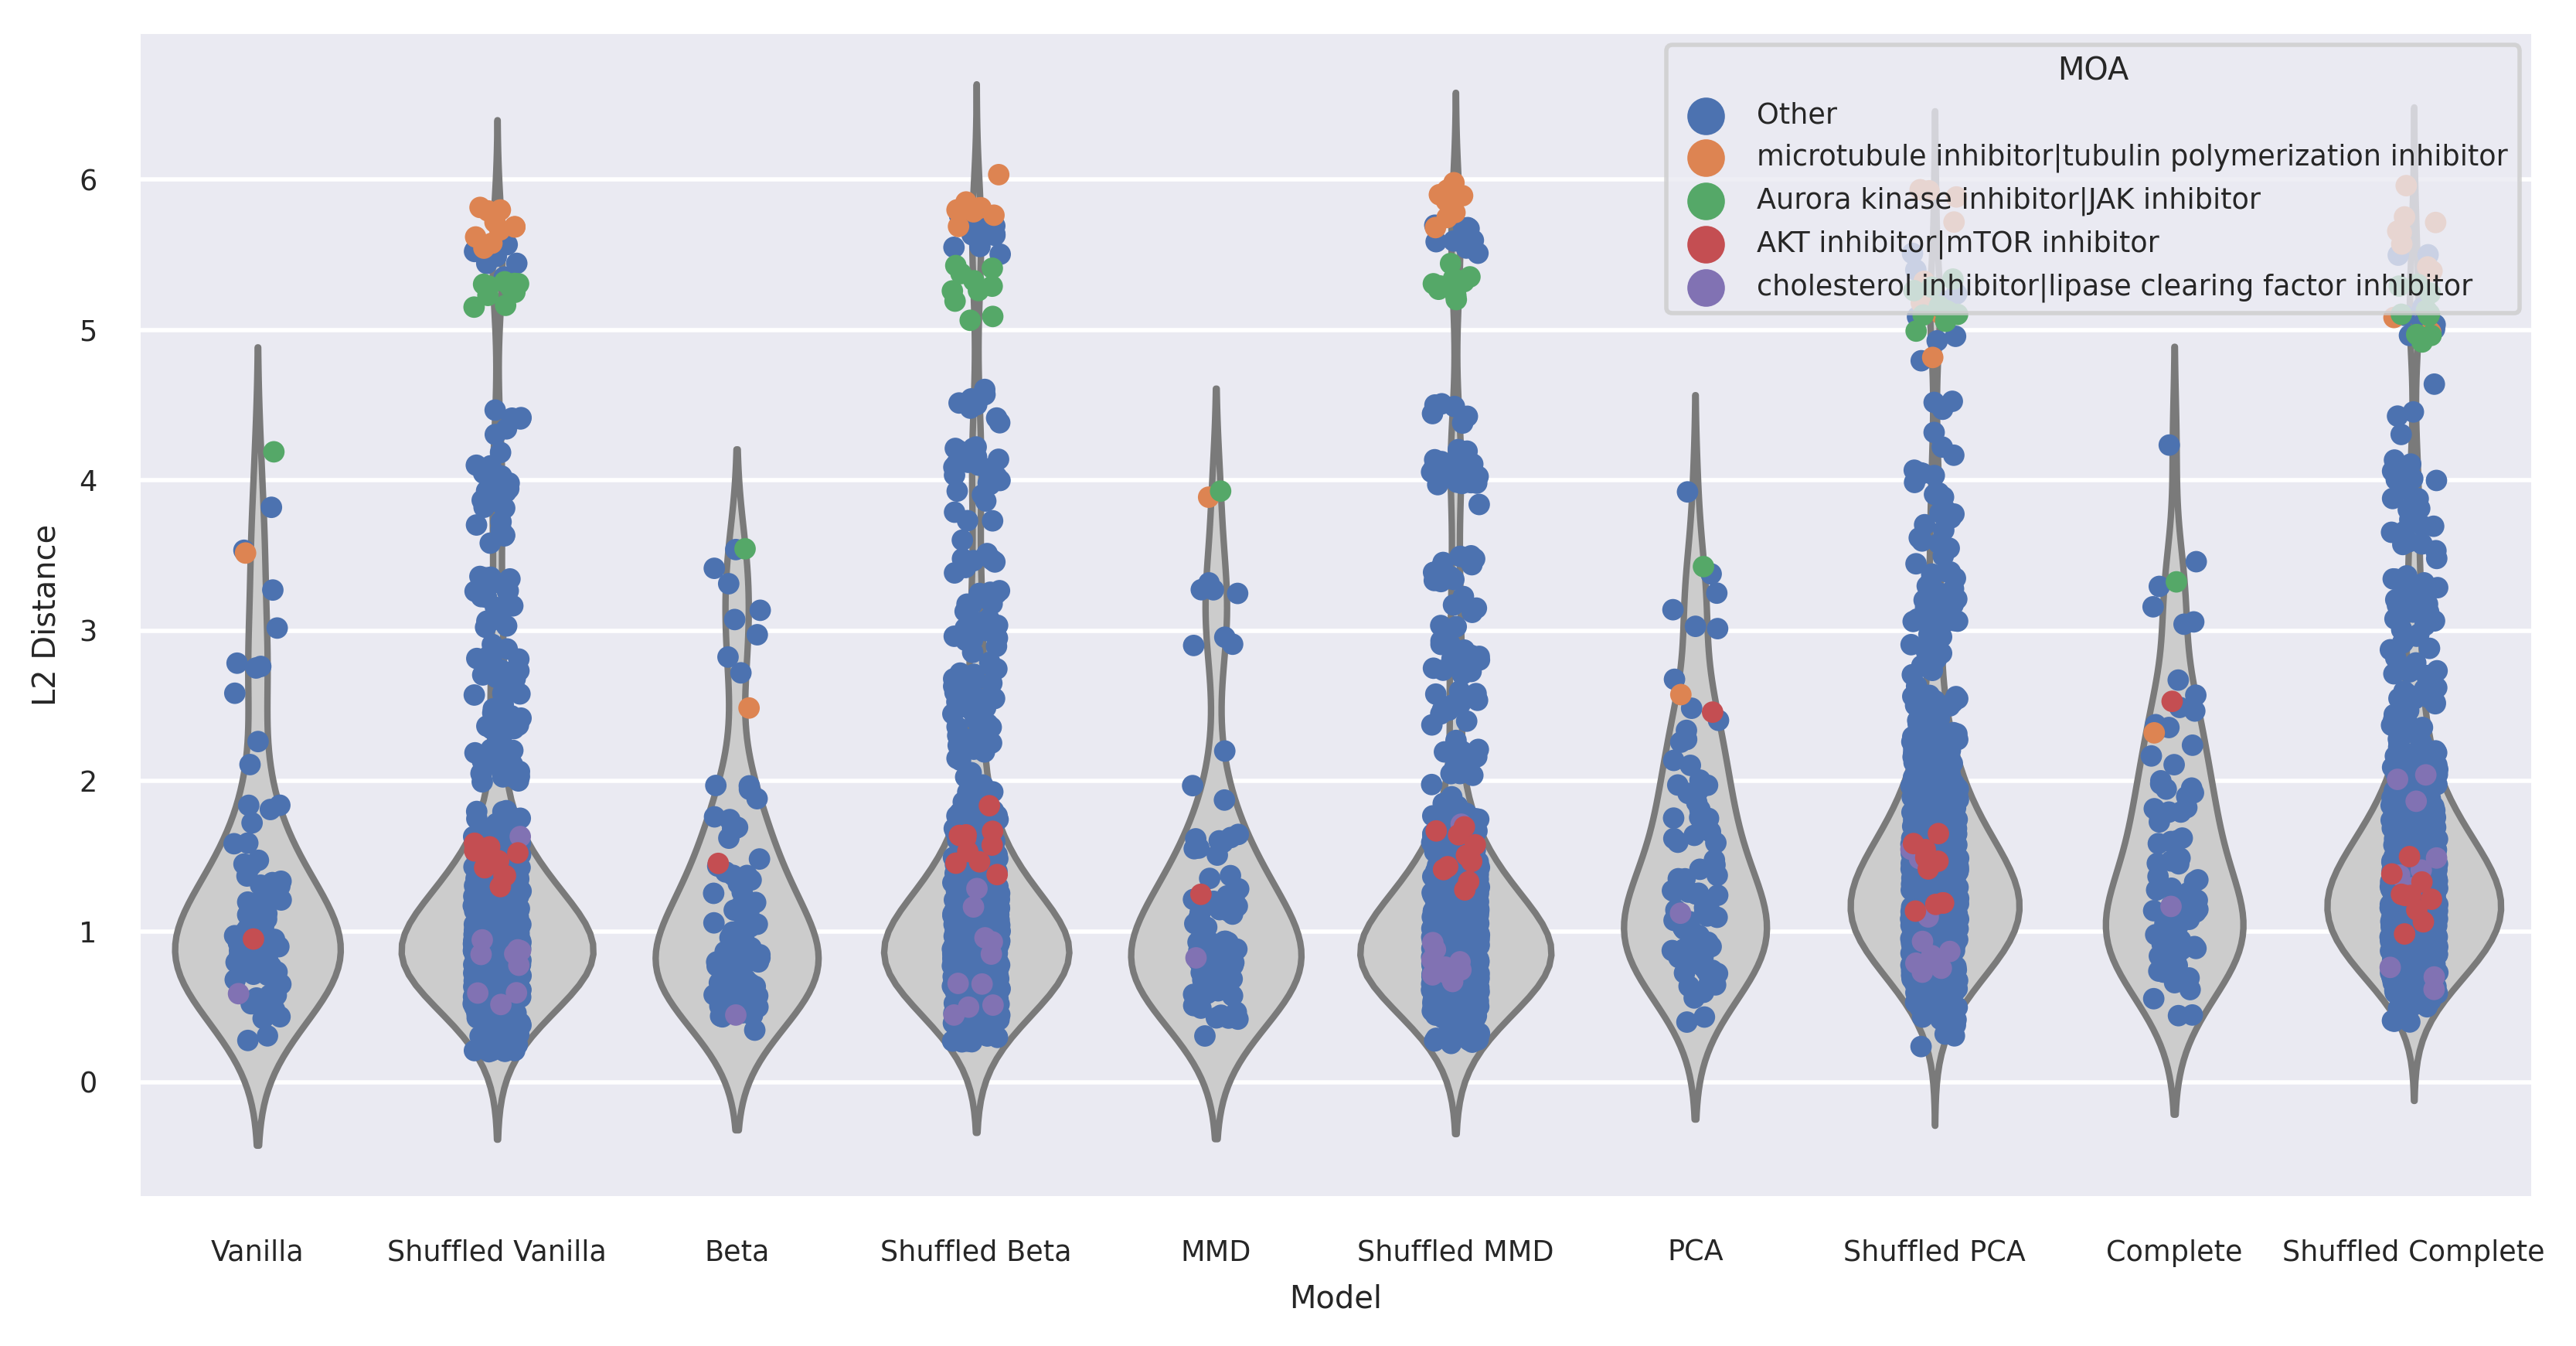

In [339]:
fig, ax = plt.subplots(dpi=400, figsize=(10, 5), sharex = True)
sns.violinplot(data = df, x = 'Model', y = 'L2 Distance', color = '.8', order = order, inner = None)
sns.stripplot(data = df, x = 'Model', y = 'L2 Distance', hue = 'MOA', order = order, hue_order = ['Other'] + color_moas)